In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Đọc dữ liệu

In [4]:
DATA_DIR = "../data/cleaned_data"

train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
val_df   = pd.read_csv(os.path.join(DATA_DIR, "val.csv"))
test_df  = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

print("Train:", train_df.shape, "Val:", val_df.shape, "Test:", test_df.shape)

Train: (1721, 23) Val: (192, 23) Test: (213, 23)


# 2. Tách X/y

In [5]:
feature_cols = [c for c in train_df.columns if c not in ('CLASS', 'NSP')]

def split_data(df, target):
    X = df[feature_cols].values
    y = df[target].values
    return X, y

# CLASS
X_train_c, y_train_c = split_data(train_df, 'CLASS')
X_val_c,   y_val_c   = split_data(val_df,   'CLASS')
X_test_c,  y_test_c  = split_data(test_df,  'CLASS')

# NSP
X_train_n, y_train_n = split_data(train_df, 'NSP')
X_val_n,   y_val_n   = split_data(val_df,   'NSP')
X_test_n,  y_test_n  = split_data(test_df,  'NSP')

# 3. Huấn luyện models

3.1. MODEL 1: Gaussian Naive Bayes

In [6]:
gnb = GaussianNB()
# Không cần scaler, mặc định GaussianNB xử lý phân phối
# Huấn luyện và kết hợp train+val
X_trval_c = np.vstack([X_train_c, X_val_c])
y_trval_c = np.concatenate([y_train_c, y_val_c])
gnb.fit(X_trval_c, y_trval_c)

GaussianNB()

Dự đoán và đánh giá CLASS

In [7]:
y_pred_c_gnb = gnb.predict(X_test_c)
print("=== GaussianNB CLASS ===")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_gnb))
print(classification_report(y_test_c, y_pred_c_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c_gnb))

=== GaussianNB CLASS ===
Accuracy: 0.5821596244131455
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        34
           1       0.72      0.50      0.59        56
           2       0.67      0.67      0.67         6
           3       0.19      1.00      0.31         5
           4       0.37      0.88      0.52         8
           5       1.00      0.56      0.72        32
           6       0.67      0.79      0.72        28
           7       1.00      0.78      0.88         9
           8       0.35      0.89      0.50         9
           9       0.50      0.35      0.41        26

    accuracy                           0.58       213
   macro avg       0.61      0.69      0.59       213
weighted avg       0.69      0.58      0.60       213

Confusion Matrix:
 [[16  2  1  0  5  0  0  0  2  8]
 [ 1 28  0 22  4  0  1  0  0  0]
 [ 2  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  1  0]
 [ 

Đánh giá NSP

In [8]:
gnb_n = GaussianNB()
X_trval_n = np.vstack([X_train_n, X_val_n])
y_trval_n = np.concatenate([y_train_n, y_val_n])
gnb_n.fit(X_trval_n, y_trval_n)

GaussianNB()

In [9]:
y_pred_n_gnb = gnb_n.predict(X_test_n)
print("\n=== GaussianNB NSP ===")
print("Accuracy:", accuracy_score(y_test_n, y_pred_n_gnb))
print(classification_report(y_test_n, y_pred_n_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test_n, y_pred_n_gnb))


=== GaussianNB NSP ===
Accuracy: 0.6619718309859155
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       159
           1       0.35      0.92      0.51        36
           2       0.45      0.50      0.47        18

    accuracy                           0.66       213
   macro avg       0.60      0.68      0.58       213
weighted avg       0.84      0.66      0.70       213

Confusion Matrix:
 [[99 51  9]
 [ 1 33  2]
 [ 0  9  9]]


3.2. MODEL 2: Multinomial Naive Bayes

In [11]:
# MultinomialNB yêu cầu dữ liệu không âm; sử dụng MinMaxScaler để đưa về [0,1]
mm = MinMaxScaler(feature_range=(0.0, 1.0))
X_trval_c_mm = mm.fit_transform(X_trval_c)
X_test_c_mm   = mm.transform(X_test_c)
X_trval_n_mm = mm.fit_transform(X_trval_n)
X_test_n_mm   = mm.transform(X_test_n)

Dự đoán và đánh giá CLASS

In [13]:
mnb = MultinomialNB()
mnb.fit(X_trval_c_mm, y_trval_c)

y_pred_c_mnb = mnb.predict(X_test_c_mm)
print("\n=== MultinomialNB CLASS ===")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_mnb))
print(classification_report(y_test_c, y_pred_c_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c_mnb))


=== MultinomialNB CLASS ===
Accuracy: 0.49765258215962443
              precision    recall  f1-score   support

           0       0.31      0.47      0.38        34
           1       0.51      0.93      0.66        56
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         8
           5       0.56      0.75      0.64        32
           6       1.00      0.25      0.40        28
           7       1.00      0.78      0.88         9
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        26

    accuracy                           0.50       213
   macro avg       0.34      0.32      0.30       213
weighted avg       0.44      0.50      0.42       213

Confusion Matrix:
 [[16 18  0  0  0  0  0  0  0  0]
 [ 1 52  0  0  0  3  0  0  0  0]
 [ 1  5  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  2  0  0  0  0]
 [ 2  6  0  0  0  0  0  0  0  0

c:\Users\DO XUAN CHIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DO XUAN CHIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DO XUAN CHIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Dự đoán và đánh giá NSP

In [14]:
mnb_n = MultinomialNB()
mnb_n.fit(X_trval_n_mm, y_trval_n)

y_pred_n_mnb = mnb_n.predict(X_test_n_mm)
print("\n=== MultinomialNB NSP ===")
print("Accuracy:", accuracy_score(y_test_n, y_pred_n_mnb))
print(classification_report(y_test_n, y_pred_n_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test_n, y_pred_n_mnb))


=== MultinomialNB NSP ===
Accuracy: 0.7605633802816901
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       159
           1       0.14      0.03      0.05        36
           2       1.00      0.11      0.20        18

    accuracy                           0.76       213
   macro avg       0.64      0.38      0.37       213
weighted avg       0.69      0.76      0.68       213

Confusion Matrix:
 [[159   0   0]
 [ 35   1   0]
 [ 10   6   2]]


# 4. So sánh

So sánh accuracy

In [19]:
acc_c_gnb = accuracy_score(y_test_c, y_pred_c_gnb)
acc_c_mnb = accuracy_score(y_test_c, y_pred_c_mnb)
acc_n_gnb = accuracy_score(y_test_n, y_pred_n_gnb)
acc_n_mnb = accuracy_score(y_test_n, y_pred_n_mnb)

In [20]:
print("\nSummary (Accuracy):")
print(f"GaussianNB CLASS: {acc_c_gnb:.4f}")
print(f"MultinomialNB CLASS: {acc_c_mnb:.4f}")
print(f"GaussianNB NSP: {acc_n_gnb:.4f}")
print(f"MultinomialNB NSP: {acc_n_mnb:.4f}")


Summary (Accuracy):
GaussianNB CLASS: 0.5822
MultinomialNB CLASS: 0.4977
GaussianNB NSP: 0.6620
MultinomialNB NSP: 0.7606


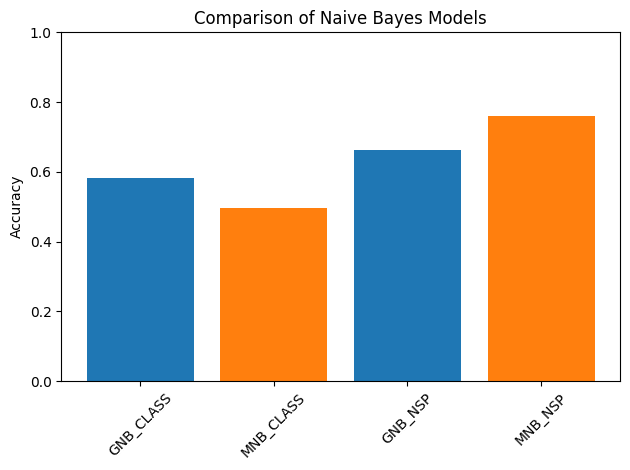

In [22]:
models = ['GNB_CLASS', 'MNB_CLASS', 'GNB_NSP', 'MNB_NSP']
accuracies = [acc_c_gnb, acc_c_mnb, acc_n_gnb, acc_n_mnb]
colors = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']

plt.figure()
plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Naive Bayes Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()